In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn

from scipy.optimize import curve_fit

resolution=20

def func(x, a, b, c):
    return c * x**(a-1) * np.exp(-b*x)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

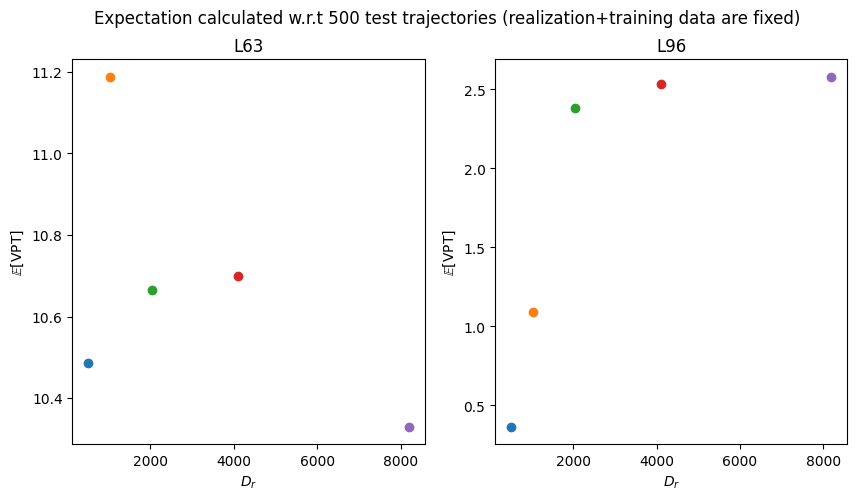

In [20]:
def get_file(system, D_r):
    return f'../data/{system}/EulerN/beta/beta_D_r-{D_r}_depth-1.csv'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]

for i, system in enumerate(['L63', 'L96']):
    for j in [512, 1024, 2048, 4096, 8192]:
        file = get_file(system, j)
        data = pd.read_csv(file)
        idx = np.argmax(data['tau_f_nmse_mean'])
        axs[i].scatter(j, data['tau_f_nmse_mean'][idx])
        axs[i].set_ylabel(r'$\mathbb{E}[\text{VPT}]$')
        axs[i].set_xlabel(r'$D_r$')
        axs[i].set_title(system)
# axs[i].axhline(0.81, label="Vlachas best", c="black")
# axs[i].legend()
fig.suptitle("Expectation calculated w.r.t 500 test trajectories (realization+training data are fixed)")
plt.savefig('../data/plots/beta-vpt.png', bbox_inches='tight', dpi=300)

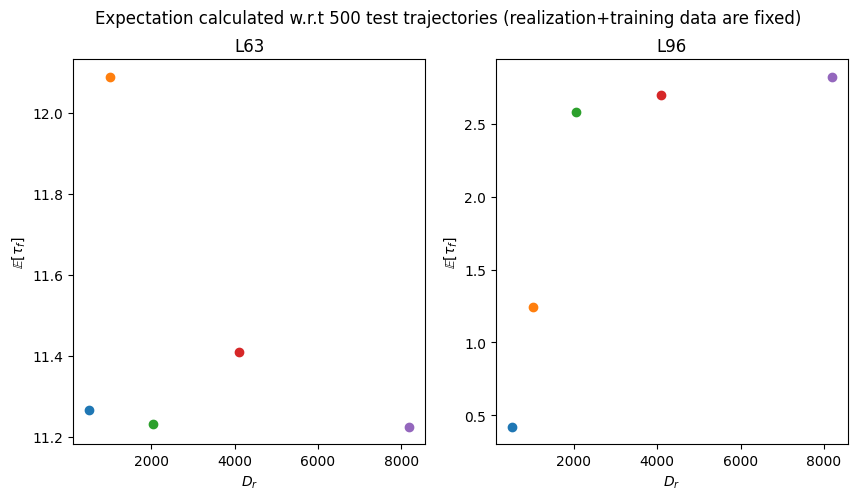

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]

def get_file(system, D_r):
    return f'../data/{system}/EulerN/beta/beta_D_r-{D_r}_depth-1.csv'

for i, system in enumerate(['L63', 'L96']):
    for j in [512, 1024, 2048, 4096, 8192]:
        file = get_file(system, j)
        data = pd.read_csv(file)
        idx = np.argmax(data['tau_f_se_mean'])
        axs[i].scatter(j, data['tau_f_se_mean'][idx])
        axs[i].set_ylabel(r'$\mathbb{E}[\tau_f]$')
        axs[i].set_xlabel(r'$D_r$')
        axs[i].set_title(system)
# axs[i].axhline(0.81, label="Vlachas best", c="black")
# axs[i].legend()
fig.suptitle("Expectation calculated w.r.t 500 test trajectories (realization+training data are fixed)")
plt.savefig('../data/plots/beta-tau_f.png', bbox_inches='tight', dpi=300)

2.0800000000000003e-09
6.76e-10
8.02e-10
6.580000000000001e-09
1e-08
1.5400000000000002e-08
4.6000000000000004e-07
2.98e-09
4.96e-09
9.460000000000001e-08
8.199999999999999e-08
3.16e-07


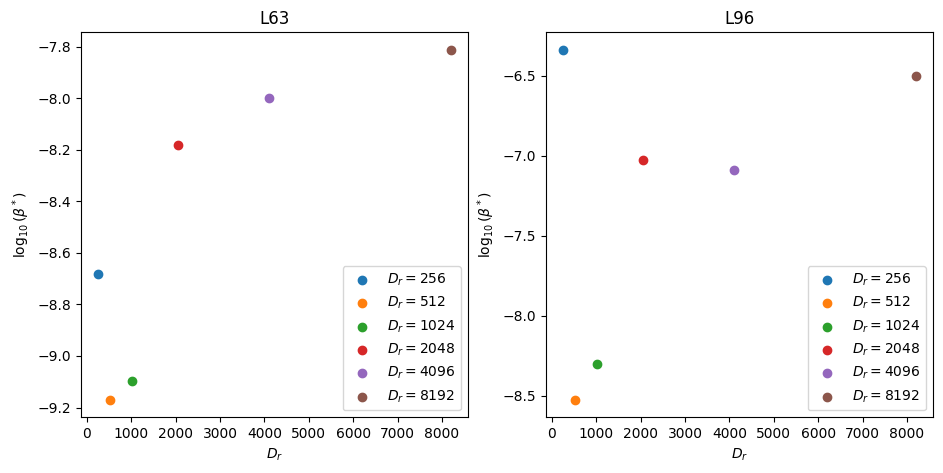

In [122]:
fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]

for i, system in enumerate(['L63', 'L96']):
    for j in [256, 512, 1024, 2048, 4096, 8192]:
        file = get_file(system, j)
        data = pd.read_csv(file)
        idx = np.argmax(data['tau_f_nmse_mean'])
        axs[i].scatter(j, np.log10(data['beta'][idx]), label=fr'$D_r={j}$')
        axs[i].set_ylabel(r'$\log_{10}(\beta^*)$')
        axs[i].set_xlabel(r'$D_r$')
        axs[i].set_title(system)
        print(data['beta'][idx])
# axs[i].axhline(0.81, label="Vlachas best", c="black")
    axs[i].legend()
# fig.suptitle("Expectation calculated w.r.t 500 test trajectories (realization+training data are fixed)")
plt.savefig('../data/plots/beta-D_r.png', bbox_inches='tight', dpi=300)

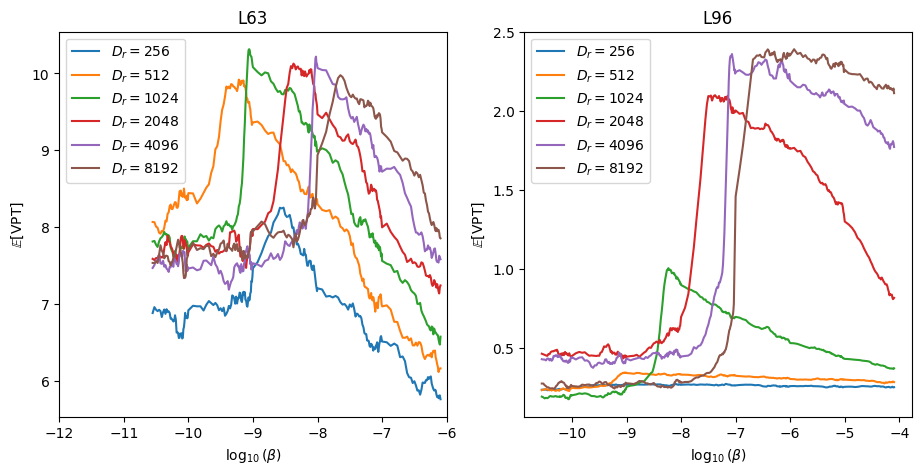

In [17]:
fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]

def get_file(system, D_r):
    return f'../data/{system}/EulerN/beta/beta_D_r-{D_r}_depth-1.csv'

for i, system in enumerate(['L63', 'L96']):
    for j in [256, 512, 1024, 2048, 4096, 8192]:
        file = get_file(system, j)
        data = pd.read_csv(file)
        # axs[i].scatter(np.log10(data['beta'].to_numpy()).reshape(-1, 20).mean(axis=1), data['tau_f_nmse_mean'].to_numpy().reshape(-1, 20).mean(axis=1), label=fr'$D_r={j}$', marker='x')
        x = np.log10(data['beta'].to_numpy())
        y = data['tau_f_nmse_mean'].to_numpy()
        # popt, _ = curve_fit(func, x, y)
        # poly = np.poly1d(np.polyfit(x, y, 200))
        # axs[i].plot(x, y, label=fr'$D_r={j}$', marker='x')
        n = 10
        axs[i].plot(x[n:-n], smooth(y, n)[n:-n], label=fr'$D_r={j}$')
        axs[i].set_xlabel(r'$\log_{10}(\beta)$')
        axs[i].set_ylabel(r'$\mathbb{E}[\text{VPT}]$')
        axs[i].set_title(system)
        # print(data['beta'][idx])
    axs[i].legend()
axs[0].set_xlim(-12, -6)
# axs[i].axhline(0.81, label="Vlachas best", c="black")

# fig.suptitle("Expectation calculated w.r.t 500 test trajectories (realization+training data are fixed)")
plt.savefig('../data/plots/beta-vpt.png', bbox_inches='tight', dpi=300)

In [3]:
import glob


def agg_beta(folder):
    files = glob.glob(folder + '/*.csv')
    agg = []
    for file in files:
        filename = os.path.basename(file)
        if filename != 'beta.csv':
            D_r = int(filename[9:].split('_')[0])
            data = pd.read_csv(file)
            idx = np.argmax(data['tau_f_nmse_mean'])
            agg.append([D_r] + data.iloc[idx].to_list())
    pd.DataFrame(sorted(agg, key=lambda x:x[0]), columns=['D_r'] + list(data.columns))\
                .to_csv(folder + '/beta.csv', index=False, mode='w')


def combine_beta(folder1, folder2, folder3=None):
    if folder3 is None:
        folder3 = folder1
    files = glob.glob(folder1 + '/*.csv')
    agg = []
    for file in files:
        filename = os.path.basename(file)
        print(filename, f'{folder2}/{filename}')
        if filename != 'beta.csv':
            D_r = int(filename[9:].split('_')[0])
            data1 = pd.read_csv(file)
            data2 = pd.read_csv(f'{folder2}/{filename}')
            data = pd.concat([data1, data2], ignore_index=True)
            data.to_csv(f'{folder3}/{filename}', index=False)

# combine_beta("../data/L96/EulerN/beta", "../data/L96/EulerN/beta1", None)#"../data/L96/EulerN/beta2")

In [8]:
agg_beta("../data/L96/ParallelEuler/beta")

In [74]:
data = pd.read_csv("../data/L63/EulerN/beta/beta.csv")


6.76e-10

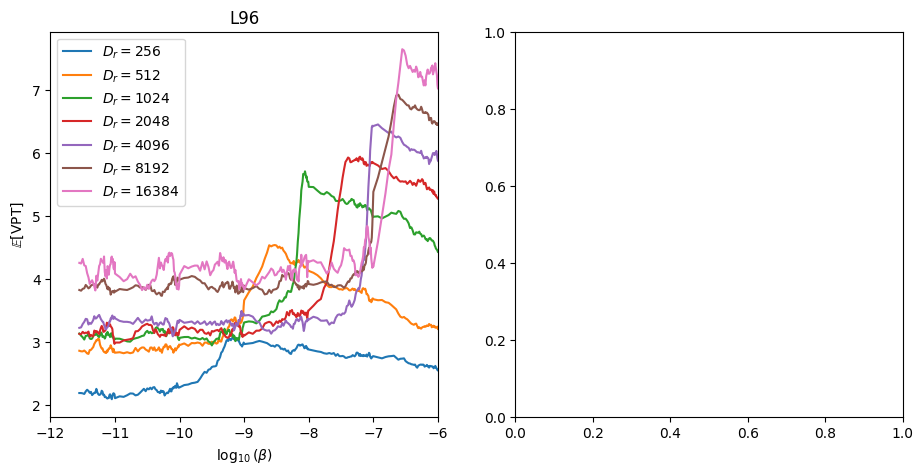

In [7]:
fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axs = [ax1, ax2]
def get_file(system, arc, D_r):
    return f'../data/{system}/{arc}/beta/beta_D_r-{D_r}_depth-1.csv'
for i, system in enumerate(['L96']):
    for j in [256, 512, 1024, 2048, 4096, 8192, 16384]:
        file = get_file(system, 'ParallelEuler', j)
        data = pd.read_csv(file)
        # axs[i].scatter(np.log10(data['beta'].to_numpy()).reshape(-1, 20).mean(axis=1), data['tau_f_nmse_mean'].to_numpy().reshape(-1, 20).mean(axis=1), label=fr'$D_r={j}$', marker='x')
        x = np.log10(data['beta'].to_numpy())
        y = data['tau_f_nmse_mean'].to_numpy()
        # popt, _ = curve_fit(func, x, y)
        # poly = np.poly1d(np.polyfit(x, y, 200))
        # axs[i].plot(x, y, label=fr'$D_r={j}$', marker='x')
        n = 10
        axs[i].plot(x[n:-n], smooth(y, n)[n:-n], label=fr'$D_r={j}$')
        axs[i].set_xlabel(r'$\log_{10}(\beta)$')
        axs[i].set_ylabel(r'$\mathbb{E}[\text{VPT}]$')
        axs[i].set_title(system)
        # print(data['beta'][idx])
    axs[i].legend()
axs[0].set_xlim(-12, -6)
# axs[i].axhline(0.81, label="Vlachas best", c="black")

# fig.suptitle("Expectation calculated w.r.t 500 test trajectories (realization+training data are fixed)")
plt.savefig('../data/plots/beta-vpt.png', bbox_inches='tight', dpi=300)